In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from pylab import rcParams
import sklearn
import urllib
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
#Load the data
from google.colab import files # Use to load data on Google Colab
#uploaded = files.upload() # Use to load data on Google Colab
df = pd.read_csv('dataset_new.csv') # (Loc_to_CGI that contain False/True) renamed

In [ ]:
df.head(5)

,Unnamed: 0,chromosome number,start position,end position,fraction of reads have dna methylation,loc_to_cgi
0,0,15,17000043,17000045,NaN,False
1,1,15,17000186,17000188,0.416667,False
2,2,15,17000252,17000254,0.914286,False
3,3,15,17000408,17000410,0.670732,False
4,4,15,17000423,17000425,0.978495,False


***Now implement the dummey algorithm***

In [ ]:
dummies = pd.get_dummies(df.loc_to_cgi)
dummies

,False,True
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
897759,1,0
897760,1,0
897761,1,0
897762,1,0


***merged the columns***

In [ ]:
merged = pd.concat([df,dummies],axis='columns')
merged

,Unnamed: 0,chromosome number,start position,end position,fraction of reads have dna methylation,loc_to_cgi,False,True
0,0,15,17000043,17000045,NaN,False,1,0
1,1,15,17000186,17000188,0.416667,False,1,0
2,2,15,17000252,17000254,0.914286,False,1,0
3,3,15,17000408,17000410,0.670732,False,1,0
4,4,15,17000423,17000425,0.978495,False,1,0
...,...,...,...,...,...,...,...,...
897759,897759,15,101980785,101980787,0.897959,False,1,0
897760,897760,15,101980791,101980793,0.843137,False,1,0
897761,897761,15,101980797,101980799,0.905660,False,1,0
897762,897762,15,101980811,101980813,0.672727,False,1,0


***Here Our Final dataset for Dummy***

In [ ]:
final = merged.drop(['loc_to_cgi'], axis='columns')
final

,Unnamed: 0,chromosome number,start position,end position,fraction of reads have dna methylation,False,True
0,0,15,17000043,17000045,NaN,1,0
1,1,15,17000186,17000188,0.416667,1,0
2,2,15,17000252,17000254,0.914286,1,0
3,3,15,17000408,17000410,0.670732,1,0
4,4,15,17000423,17000425,0.978495,1,0
...,...,...,...,...,...,...,...
897759,897759,15,101980785,101980787,0.897959,1,0
897760,897760,15,101980791,101980793,0.843137,1,0
897761,897761,15,101980797,101980799,0.905660,1,0
897762,897762,15,101980811,101980813,0.672727,1,0


***Simple Processing on Dataset***

In [ ]:
df1= final.replace(np.nan, 0, regex=True)
df1

,Unnamed: 0,chromosome number,start position,end position,fraction of reads have dna methylation,False,True
0,0,15,17000043,17000045,0.000000,1,0
1,1,15,17000186,17000188,0.416667,1,0
2,2,15,17000252,17000254,0.914286,1,0
3,3,15,17000408,17000410,0.670732,1,0
4,4,15,17000423,17000425,0.978495,1,0
...,...,...,...,...,...,...,...
897759,897759,15,101980785,101980787,0.897959,1,0
897760,897760,15,101980791,101980793,0.843137,1,0
897761,897761,15,101980797,101980799,0.905660,1,0
897762,897762,15,101980811,101980813,0.672727,1,0


*** X and Y ***

In [ ]:
X_prime = df1.iloc[:,[2,3,5,6]].values
y = df1.iloc[:,4].values

*** Devided Train ,Test from dataset ***

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_prime,y,test_size=.33,random_state=17)

***Model fit to KNN**

In [ ]:
clf=neighbors.KNeighborsRegressor(n_neighbors=2)
clf.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [ ]:
X_test

array([[86450564, 86450566,        1,        0],
       [73301748, 73301750,        1,        0],
       [42437884, 42437886,        1,        0],
       ...,
       [88779499, 88779501,        1,        0],
       [31205156, 31205158,        1,        0],
       [82748825, 82748827,        1,        0]])

*** Y prediction*** 

In [ ]:
y_pred=clf.predict(X_test)
y_pred

array([0.4194, 0.9555, 0.9778, ..., 0.9459, 0.796 , 0.6573])

*** Error Check***

In [ ]:

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.13971864671121606
MSE: 0.046797872771229224
RMSE: 0.21632815991273355


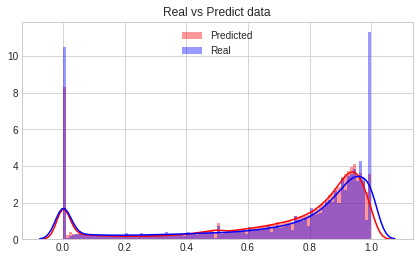

In [ ]:
# Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().



import seaborn as sns
sns.distplot((y_pred),bins=100,color="r", label="Predicted")
sns.distplot((y_test),bins=100,color="b", label="Real")
plt.title("Real vs Predict data")
plt.legend()

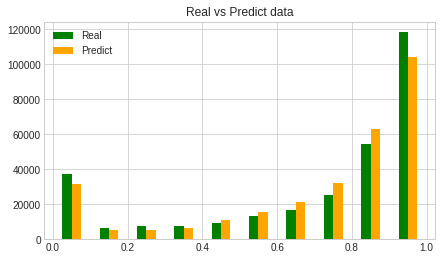

In [ ]:
plt.hist([y_test,y_pred],rwidth=.5, color=['green','orange'],label=['Real','Predict'])
plt.title("Real vs Predict data")
plt.legend()

In [ ]:
# print the R-squared value for the model
clf.score(X_train,y_train)

0.8719092793457268

***Implement One Hot encoder***


First step is to use label encoder to convert town names into numbers

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

*** Dataset processing for One Hot encoder***

In [ ]:
df2 = df
# le.fit_transform(df2.loc_to_cgi)
df2.loc_to_cgi = le.fit_transform(df2.loc_to_cgi)
df2

,Unnamed: 0,chromosome number,start position,end position,fraction of reads have dna methylation,loc_to_cgi
0,0,15,17000043,17000045,NaN,0
1,1,15,17000186,17000188,0.416667,0
2,2,15,17000252,17000254,0.914286,0
3,3,15,17000408,17000410,0.670732,0
4,4,15,17000423,17000425,0.978495,0
...,...,...,...,...,...,...
897759,897759,15,101980785,101980787,0.897959,0
897760,897760,15,101980791,101980793,0.843137,0
897761,897761,15,101980797,101980799,0.905660,0
897762,897762,15,101980811,101980813,0.672727,0


**** X and Y ***


In [ ]:
X_prime = df1.iloc[:,[2,3,5]].values
y = df1.iloc[:,4].values

***The column numbers to be transformed (here is [0] but can be [0, 1, 3]***

In [ ]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
[('loc_to_cgi', OneHotEncoder(categories='auto'), [2])],   # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                                         # Leave the rest of the columns untouched
)

X = ct.fit_transform(X_prime)

In [ ]:
X

array([[0.0000e+00, 1.0000e+00, 1.7000e+07, 1.7000e+07],
       [0.0000e+00, 1.0000e+00, 1.7000e+07, 1.7000e+07],
       [0.0000e+00, 1.0000e+00, 1.7000e+07, 1.7000e+07],
       ...,
       [0.0000e+00, 1.0000e+00, 1.0198e+08, 1.0198e+08],
       [0.0000e+00, 1.0000e+00, 1.0198e+08, 1.0198e+08],
       [0.0000e+00, 1.0000e+00, 1.0198e+08, 1.0198e+08]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_prime,y,test_size=.33,random_state=17)

In [ ]:
clf=neighbors.KNeighborsRegressor(n_neighbors=2)
clf.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [ ]:
X_test

array([[86450564, 86450566,        1],
       [73301748, 73301750,        1],
       [42437884, 42437886,        1],
       ...,
       [88779499, 88779501,        1],
       [31205156, 31205158,        1],
       [82748825, 82748827,        1]])

*** predict Y***


In [ ]:
y_pred=clf.predict(X_test)
y_pred

array([0.4194, 0.9555, 0.9778, ..., 0.9459, 0.796 , 0.6573])

***Error Check***

In [ ]:
# array([0.5196075, 0.9154135, 0.600529 , ..., 0.9513795, 0.878853 ,
#        0.8294835])

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.13971864671121606
MSE: 0.046797872771229224
RMSE: 0.21632815991273355


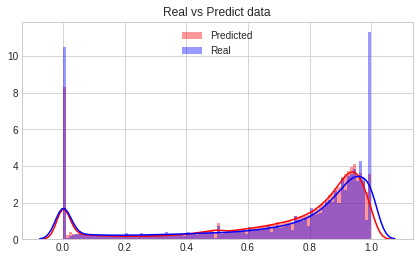

In [ ]:
# Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().



import seaborn as sns
sns.distplot((y_pred),bins=100,color="r", label="Predicted")
sns.distplot((y_test),bins=100,color="b", label="Real")
plt.title("Real vs Predict data")
plt.legend()

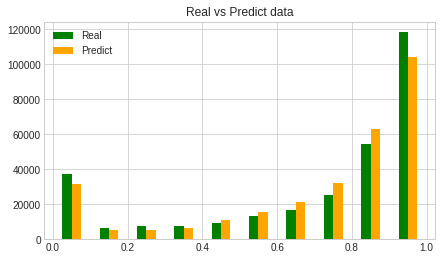

In [ ]:
plt.hist([y_test,y_pred],rwidth=.5, color=['green','orange'],label=['Real','Predict'])
plt.title("Real vs Predict data")
plt.legend()

In [ ]:
# print the R-squared value for the model
clf.score(X_train,y_train)

0.8719092793457268

***Implement model to known Dataset***

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from pylab import rcParams
import sklearn
import urllib
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns

In [ ]:
final

,index,Unnamed: 0,chromosome number,start position,end position,fraction of reads have dna methylation,False,True
0,1,1,15,17000186,17000188,0.416667,1,0
1,2,2,15,17000252,17000254,0.914286,1,0
2,3,3,15,17000408,17000410,0.670732,1,0
3,4,4,15,17000423,17000425,0.978495,1,0
4,5,5,15,17000530,17000532,0.756522,1,0
...,...,...,...,...,...,...,...,...
121488,161829,161829,15,31260364,31260366,0.969697,1,0
121489,161830,161830,15,31260375,31260377,0.851852,1,0
121490,161831,161831,15,31260418,31260420,0.952381,1,0
121491,161832,161832,15,31260420,31260422,1.000000,1,0


*** Here We process previous dataset to create Known dataset***

In [ ]:
nan_value = float("NaN")
final.replace("", nan_value, inplace=True)
final.dropna(subset = ["fraction of reads have dna methylation"], inplace=True)
final= final.reset_index()

In [ ]:
final

,index,Unnamed: 0,chromosome number,start position,end position,fraction of reads have dna methylation,False,True
0,1,1,15,17000186,17000188,0.416667,1,0
1,2,2,15,17000252,17000254,0.914286,1,0
2,3,3,15,17000408,17000410,0.670732,1,0
3,4,4,15,17000423,17000425,0.978495,1,0
4,5,5,15,17000530,17000532,0.756522,1,0
...,...,...,...,...,...,...,...,...
121488,161829,161829,15,31260364,31260366,0.969697,1,0
121489,161830,161830,15,31260375,31260377,0.851852,1,0
121490,161831,161831,15,31260418,31260420,0.952381,1,0
121491,161832,161832,15,31260420,31260422,1.000000,1,0


***Implement KNN on the Known dataset***

In [ ]:
train, validate, test = np.split(final.sample(frac=1), [int(.6*len(final)), int(.8*len(final))])
x_train = train.iloc[:,[3,4,6,7]].values
y_train = train.iloc[:,5].values
x_validate = validate.iloc[:,[3,4,6,7]].values
y_validate = validate.iloc[:,5].values
x_test = test.iloc[:,[3,4,6,7]].values
y_test = test.iloc[:,5].values
# for k in range(10):
k=2
# rmse= []
clf=neighbors.KNeighborsRegressor(n_neighbors=k)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_validate)
error = sqrt(mean_squared_error(y_validate, y_pred))
# rmse[k].append(error)
print('RMSE value for k= ', k, 'is: ', error )
    # curve = pd.DataFrame(rmse_k)
    # curve.plot(k, rmse_k)
    # curve.xlabel('Number of Neighbors')
    # curve.ylabel('Route Mean Square Errors')
    # curve.show()

RMSE value for k=  2 is:  192.4499393492261


*** Y prediction ***

In [ ]:
y_pred

array([20182506.5, 22897205. , 28108805. , ..., 24523490. , 28452254. ,
       22796005. ])

*** Error check****

In [ ]:
#print ('R Squared =',r2_score(y_validate, y_pred))
print ('MAE =',mean_absolute_error(y_validate, y_pred))
print ('MSE =',mean_squared_error(y_validate, y_pred))
print ('RMS =',sqrt(mean_squared_error(y_validate, y_pred)))

MAE = 81.67319642783653
MSE = 37036.97915552081
RMS = 192.4499393492261


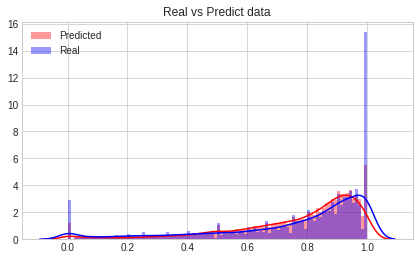

In [ ]:
# sns.distplot((y_pred),bins=50, color="B", axlabel='Y Predicted Value', label='Beta value - Predicted values vs Real Values');
# sns.distplot((y_validate),bins=50, color="Y", axlabel='Y Predicted Value', label='Beta value - Predicted values vs Real Values');
# # sns.lmplot( x='x', y='y', data=df, fit_reg=False, hue='x', legend=False, palette="Blues")
sns.distplot((y_pred),bins=100,color="r", label="Predicted")
sns.distplot((y_validate),bins=100,color="b", label="Real")
plt.title("Real vs Predict data")
plt.legend()

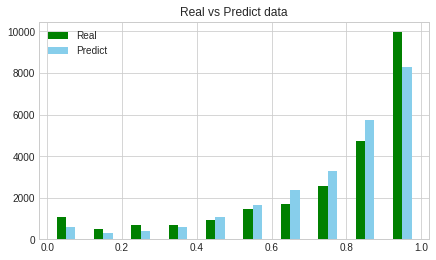

In [ ]:
plt.hist([y_validate,y_pred],rwidth=.5, color=['green','skyblue'],label=['Real','Predict'])
plt.title("Real vs Predict data")
plt.legend()

In [ ]:
clf.score(x_validate,y_validate)

0.18501926837242721

In [ ]:
clf.score(x_test,y_test)

0.175901498629898

***Now we implement the KNN model on the dataset that contain 1/0 ***

In [ ]:
#Load the data
from google.colab import files # Use to load data on Google Colab
#uploaded = files.upload() # Use to load data on Google Colab
dataset= pd.read_csv('loc_to_cgi.csv')

In [ ]:
dataset.head(5)

,Unnamed: 0,chromosome number,start position,end position,number of bisulfite converted reads,number of bisulfite un-converted reads,fraction of reads have dna methylation,Loc_to_CGI
0,0,15,17000043,17000045,NaN,NaN,NaN,0
1,1,15,17000186,17000188,14.0,10.0,0.416667,0
2,2,15,17000252,17000254,3.0,32.0,0.914286,0
3,3,15,17000408,17000410,27.0,55.0,0.670732,0
4,4,15,17000423,17000425,2.0,91.0,0.978495,0


*** processing the Dataset ***

In [ ]:
dataset_1= dataset.replace(np.nan, 0, regex=True)

In [ ]:
dataset_1[:5] 

,Unnamed: 0,chromosome number,start position,end position,number of bisulfite converted reads,number of bisulfite un-converted reads,fraction of reads have dna methylation,Loc_to_CGI
0,0,15,17000043,17000045,0.0,0.0,0.000000,0
1,1,15,17000186,17000188,14.0,10.0,0.416667,0
2,2,15,17000252,17000254,3.0,32.0,0.914286,0
3,3,15,17000408,17000410,27.0,55.0,0.670732,0
4,4,15,17000423,17000425,2.0,91.0,0.978495,0


*** load visualization function***

In [ ]:
np.set_printoptions(precision=4,suppress=True)
%matplotlib inline
rcParams['figure.figsize']=7,4
plt.style.use('seaborn-whitegrid')
plt.show

<function matplotlib.pyplot.show>

In [ ]:
X_prime = dataset_1.iloc[:,[2,3,7]].values
y = dataset_1.iloc[:,6].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_prime,y,test_size=.33,random_state=17)

In [ ]:
clf=neighbors.KNeighborsRegressor(n_neighbors=2)
clf.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [ ]:
X_test

array([[86450564, 86450566,        0],
       [73301748, 73301750,        0],
       [42437884, 42437886,        0],
       ...,
       [88779499, 88779501,        0],
       [31205156, 31205158,        0],
       [82748825, 82748827,        0]])

In [ ]:
#Here show 1st one prediction and test value

print(X_test[0])
y_pred1=clf.predict([[17000043, 17000045,0]])
y_pred1

[86450564 86450566        0]


array([0.2083])

In [ ]:
print(X_test)
y_pred=clf.predict(X_test)

[[86450564 86450566        0]
 [73301748 73301750        0]
 [42437884 42437886        0]
 ...
 [88779499 88779501        0]
 [31205156 31205158        0]
 [82748825 82748827        0]]


In [ ]:
#print predict

y_pred

array([0.4194, 0.9555, 0.9778, ..., 0.9459, 0.796 , 0.6573])

In [ ]:
# Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.



from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.13971864671121606
MSE: 0.04679787277122922
RMSE: 0.21632815991273355


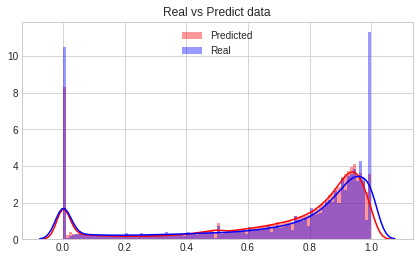

In [ ]:
# Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().



import seaborn as sns
sns.distplot((y_pred),bins=100,color="r", label="Predicted")
sns.distplot((y_test),bins=100,color="b", label="Real")
plt.title("Real vs Predict data")
plt.legend()

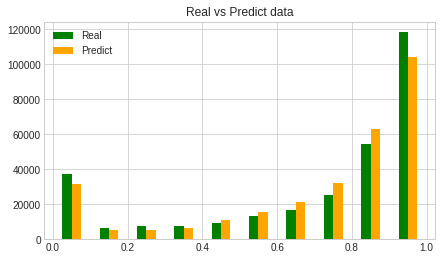

In [ ]:
plt.hist([y_test,y_pred],rwidth=.5, color=['green','orange'],label=['Real','Predict'])
plt.title("Real vs Predict data")
plt.legend()

Text(0.5, 1.0, 'Correlation')

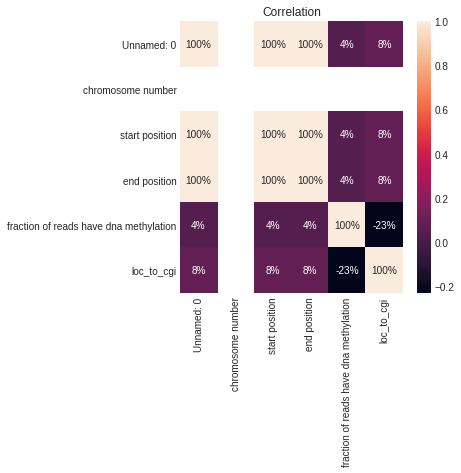

In [ ]:
#Visualize the correlation by creating a heat map.



import seaborn as sns
plt.figure(figsize=(5,5))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')
plt.title("Correlation")

In [ ]:
# print the R-squared value for the model
clf.score(X_train,y_train)

0.8719092793457268